### Plot the Cycle 24 RHESSI flare latitudes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Just some plotting setup - need stix installed 
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.size'] = 20
plt.rcParams['font.family'] = 'STIXGeneral'

In [3]:
# Flare list from Loumou et al. 2018 https://doi.org/10.1051/0004-6361/201731050 
# modified version of the original RHESSI list http://hesperia.gsfc.nasa.gov/hessidata/dbase/hessi_flare_list.txt
rfl = pd.read_csv('rhessi_fl2008_2018.csv',sep=',')
decyear=np.array(rfl['DecYear'])
lat=np.array(rfl['Lat'])

In [4]:
# How many flares in each class
# Note here that the GOES 1-8 Flux has the pre-flare flux subtracted (hence the 'B')
ax_ind=np.argwhere((rfl['BGFlx'] >= 1e-8)).flatten()
a_ind=np.argwhere((rfl['BGFlx'] >= 1e-8) & (rfl['BGFlx'] < 1e-7)).flatten()
b_ind=np.argwhere((rfl['BGFlx'] >= 1e-7) & (rfl['BGFlx'] < 1e-6)).flatten()
c_ind=np.argwhere((rfl['BGFlx'] >= 1e-6) & (rfl['BGFlx'] < 1e-5)).flatten()
m_ind=np.argwhere((rfl['BGFlx'] >= 1e-5) & (rfl['BGFlx'] < 1e-4)).flatten()
x_ind=np.argwhere(rfl['BGFlx'] > 1e-4)

print('Total Number: ',len(ax_ind))
print('Number of A-Class: ',len(a_ind))
print('Number of B-Class: ',len(b_ind))
print('Number of C-Class: ',len(c_ind))
print('Number of M-Class: ',len(m_ind))
print('Number of X-Class: ',len(x_ind))

Total Number:  44523
Number of A-Class:  27753
Number of B-Class:  13876
Number of C-Class:  2589
Number of M-Class:  284
Number of X-Class:  21


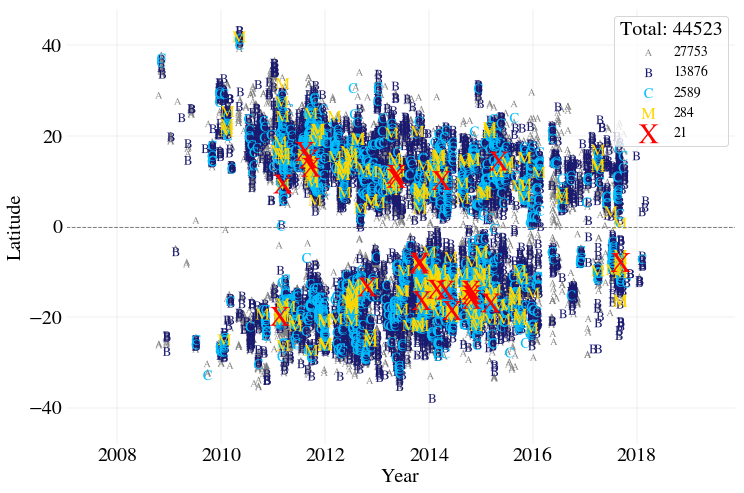

In [5]:
# Make a nice plot 
cta='grey'
ctb='midnightblue'
ctc='deepskyblue'
ctm='gold'
ctx='red'

fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(decyear[a_ind],lat[a_ind],\
               color=cta,marker='$\mathrm{A}$',s=50,label=str(len(a_ind)),edgecolors='none')
ax.scatter(decyear[b_ind],lat[b_ind],\
               color=ctb,marker='$\mathrm{B}$',s=75,label=str(len(b_ind)),edgecolors='none')
ax.scatter(decyear[c_ind],lat[c_ind],\
               color=ctc,marker='$\mathrm{C}$',s=100,label=str(len(c_ind)),edgecolors='none')
ax.scatter(decyear[m_ind],lat[m_ind],\
               color=ctm,marker='$\mathrm{M}$',s=200,label=str(len(m_ind)),edgecolors='none')
ax.scatter(decyear[x_ind],lat[x_ind],\
               color=ctx,marker='$\mathrm{X}$',s=400,label=str(len(x_ind)),edgecolors='none')
ax.plot([2007,2019.9],[0,0],lw=1,color='grey',ls='dashed')

ax.set_xlabel('Year')
ax.set_ylabel('Latitude')
ax.set_xlim([2007,2019.9])
ax.set_ylim([-48,48])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.label.set_color('k')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis="x", length=0, width=0)
ax.tick_params(axis="y", length=0, width=0)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.legend(fontsize='x-small',loc=1,title='Total: '+str(len(ax_ind)))
plt.savefig('rhfl_lat.png',dpi=150,bbox_inches='tight',pad_inches=0.2,transparent=True)
plt.show()